In [1]:
#Import libraries 
import pandas as pd
import numpy as np 
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
#path to project folder 
path = r'/Users/libertyonia/Documents/Covid'

In [3]:
#import cases_deaths_gender.csv 
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','cases_deaths_gender.csv'))

/var/folders/7x/7rtx5kls68d6l5dc55xbmjph0000gn/T/ipykernel_66440/989957627.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','cases_deaths_gender.csv'))


In [4]:
#check the column names of the dataframe 
df.columns

Index(['Unnamed: 0', 'county_code', 'county', 'state', 'lat', 'long', 'date',
       'cases', 'state_code', 'deaths', 'male', 'female', 'median_age',
       'population', 'female_percentage', 'region'],
      dtype='object')

In [5]:
#drop 'Unnamed: 0' column
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
#check the first ten rows of the df dataframe 
df.head(10)

,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region
0,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-22,0,AL,0,26874,28326,37.8,55200,51.315217,South
1,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-23,0,AL,0,26874,28326,37.8,55200,51.315217,South
2,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-24,0,AL,0,26874,28326,37.8,55200,51.315217,South
3,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-25,0,AL,0,26874,28326,37.8,55200,51.315217,South
4,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-26,0,AL,0,26874,28326,37.8,55200,51.315217,South
5,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-27,0,AL,0,26874,28326,37.8,55200,51.315217,South
6,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-28,0,AL,0,26874,28326,37.8,55200,51.315217,South
7,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-29,0,AL,0,26874,28326,37.8,55200,51.315217,South
8,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-30,0,AL,0,26874,28326,37.8,55200,51.315217,South
9,1001.0,Autauga,Alabama,32.539527,-86.644082,2020-01-31,0,AL,0,26874,28326,37.8,55200,51.315217,South


In [7]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [8]:
#check the number of rows and columns of the original dataframe
df.shape

(3480820, 15)

In [9]:
#check datatypes of the dataframe 
df.dtypes

county_code          float64
county                object
state                 object
lat                  float64
long                 float64
date                  object
cases                  int64
state_code            object
deaths                 int64
male                   int64
female                 int64
median_age           float64
population             int64
female_percentage    float64
region                object
dtype: object

In [10]:
#check missing values 
df.isnull().sum()

county_code              0
county                   0
state                    0
lat                      0
long                     0
date                     0
cases                    0
state_code           85399
deaths                   0
male                     0
female                   0
median_age               0
population               0
female_percentage        0
region                   0
dtype: int64

In [11]:
#check the missing values in the dataframe 
df_nan = df[df['state_code'].isnull() == True]
df_nan

,county_code,county,state,lat,long,date,cases,state_code,deaths,male,female,median_age,population,female_percentage,region
344839,11001.0,District of Columbia,District of Columbia,38.904178,-77.016560,2020-01-22,0,NaN,0,324881,359617,33.9,684498,52.537334,South
344840,11001.0,District of Columbia,District of Columbia,38.904178,-77.016560,2020-01-23,0,NaN,0,324881,359617,33.9,684498,52.537334,South
344841,11001.0,District of Columbia,District of Columbia,38.904178,-77.016560,2020-01-24,0,NaN,0,324881,359617,33.9,684498,52.537334,South
344842,11001.0,District of Columbia,District of Columbia,38.904178,-77.016560,2020-01-25,0,NaN,0,324881,359617,33.9,684498,52.537334,South
344843,11001.0,District of Columbia,District of Columbia,38.904178,-77.016560,2020-01-26,0,NaN,0,324881,359617,33.9,684498,52.537334,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582504,72153.0,Yauco,Puerto Rico,18.080374,-66.858814,2022-12-29,10740,NaN,0,17475,18964,43.0,36439,52.043141,West
2582505,72153.0,Yauco,Puerto Rico,18.080374,-66.858814,2022-12-30,10777,NaN,0,17475,18964,43.0,36439,52.043141,West
2582506,72153.0,Yauco,Puerto Rico,18.080374,-66.858814,2022-12-31,10786,NaN,0,17475,18964,43.0,36439,52.043141,West
2582507,72153.0,Yauco,Puerto Rico,18.080374,-66.858814,2023-01-22,11108,NaN,0,17475,18964,43.0,36439,52.043141,West


In [12]:
#drop missing values because they make less than 1% of the data
df.dropna(inplace = True)

In [13]:
#check missing values 
df.isnull().sum()

county_code          0
county               0
state                0
lat                  0
long                 0
date                 0
cases                0
state_code           0
deaths               0
male                 0
female               0
median_age           0
population           0
female_percentage    0
region               0
dtype: int64

In [14]:
# Find duplicates

df_dups = df[df.duplicated()]

In [15]:
#check the number of duplicates -- there are none
df_dups.shape

(0, 15)

In [16]:
#check column and row numbers
df.shape

(3395421, 15)

In [17]:
#check mixed datatypes
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

In [18]:
#export cleaned dataset for future use 
df.to_csv(os.path.join(path,'02 Data','Prepared Data','cases_deaths_gender_2.csv'))

In [19]:
#create a function that takes the first values of the population, male, female, median_age, female_percentage, state,and region values 
#the function also takes the final values from cases and deaths, because this data is a time series
def custom_aggregation(group):
    return pd.Series({
        'state' : group['state'].iloc[0], #Take the first state name 
        'population': group['population'].iloc[0],              # Take the first population value
        'male': group['male'].iloc[0],    # Take the first male population value
        'female': group['female'].iloc[0],# Take the first female population value
        'median_age' : group['median_age'].iloc[0], #Take the first median_age
        'region' : group['region'].iloc[0], #Take the first region
        'female_percentage' : group['female_percentage'].iloc[0], #Take the first female_percentage
        'cases': group['cases'].iloc[-1],                     # Take the final value in cases
        'deaths': group['deaths'].iloc[-1]                    # Take the final value in deaths
    })

In [20]:
#apply function to the original dataframe and group the 'county' column
aggregated_df = df.groupby('county').apply(custom_aggregation).reset_index()

In [21]:
#check the number of rows and columns
aggregated_df.shape

(1838, 10)

In [22]:
#check the data
aggregated_df.head()

,county,state,population,male,female,median_age,region,female_percentage,cases,deaths
0,Abbeville,South Carolina,24657,11966,12691,43.8,South,51.470171,7806,78
1,Acadia,Louisiana,62568,30491,32077,36.2,South,51.267421,18892,310
2,Accomack,Virginia,32742,15861,16881,45.9,South,51.557632,9055,119
3,Ada,Idaho,446052,223367,222685,36.7,West,49.923552,159699,1137
4,Adair,Iowa,7124,3516,3608,45.4,Midwest,50.645705,9787,79


In [23]:
#check the columns
aggregated_df.columns.to_list()

['county',
 'state',
 'population',
 'male',
 'female',
 'median_age',
 'region',
 'female_percentage',
 'cases',
 'deaths']

In [24]:
#check that the above function worked
check = aggregated_df[aggregated_df['county'] =='Autauga']
check.head()

,county,state,population,male,female,median_age,region,female_percentage,cases,deaths
81,Autauga,Alabama,55200,26874,28326,37.8,South,51.315217,19732,230


In [25]:
#check the descriptive statistics of the aggregated dataframe
aggregated_df.describe()

,population,male,female,median_age,female_percentage,cases,deaths
count,1.838000e+03,1.838000e+03,1.838000e+03,1838.000000,1838.000000,1.838000e+03,1838.000000
mean,1.114218e+05,5.488806e+04,5.653374e+04,41.054842,49.842149,3.542489e+04,376.927639
std,3.600450e+05,1.771467e+05,1.829354e+05,5.580660,2.584038,1.312644e+05,1313.897407
min,7.500000e+01,3.800000e+01,3.700000e+01,22.900000,21.003945,0.000000e+00,0.000000
25%,1.080300e+04,5.413500e+03,5.380250e+03,37.600000,49.301386,2.848250e+03,43.000000
50%,2.590600e+04,1.291100e+04,1.291600e+04,40.900000,50.348316,7.791000e+03,109.000000
75%,7.625525e+04,3.792325e+04,3.800200e+04,44.375000,51.142481,2.263025e+04,268.000000
max,1.009805e+07,4.976788e+06,5.121264e+06,60.100000,58.613660,3.691301e+06,35250.000000


## 3. Create a correlation matrix heatmap (colored)
#### *Working with the aggregated data moving forward, because there are a lot of duplicates of populations, cases, and deaths from the original time-series data
- Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

In [26]:
#create a correlation matrix 
aggregated_df.corr()

/var/folders/7x/7rtx5kls68d6l5dc55xbmjph0000gn/T/ipykernel_66440/2172629871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  aggregated_df.corr()


,population,male,female,median_age,female_percentage,cases,deaths
population,1.000000,0.999894,0.999900,-0.157720,0.107405,0.883540,0.846223
male,0.999894,1.000000,0.999588,-0.158632,0.103563,0.883753,0.845186
female,0.999900,0.999588,1.000000,-0.156804,0.111103,0.883154,0.847056
median_age,-0.157720,-0.158632,-0.156804,1.000000,0.031938,-0.122519,-0.104085
female_percentage,0.107405,0.103563,0.111103,0.031938,1.000000,0.074770,0.084170
cases,0.883540,0.883753,0.883154,-0.122519,0.074770,1.000000,0.968949
deaths,0.846223,0.845186,0.847056,-0.104085,0.084170,0.968949,1.000000


In [27]:
#drop non-numerical columns from the aggregated dataframe
df_sub = aggregated_df.drop(columns = ['male','female','county', 'region', 'state', 'median_age','female_percentage'])

Text(0.5, 1.0, 'Correlation Matrix')

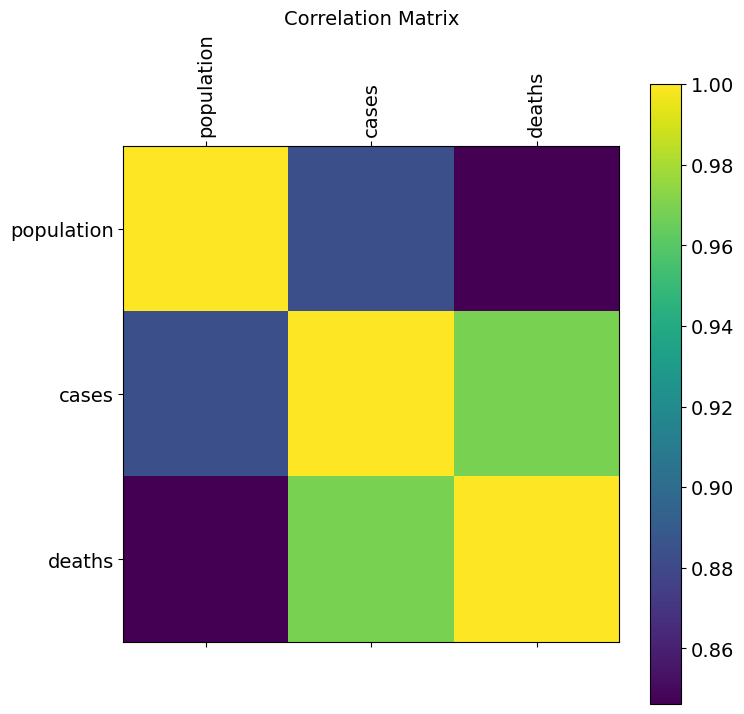

In [28]:
#Creating a correlation heatmap

corr_figure = plt.figure(figsize=(8, 8)) # Size of the figure
plt.matshow(df_sub.corr(), fignum=corr_figure.number) # Type of plot, correlation heatmap
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colorbar
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

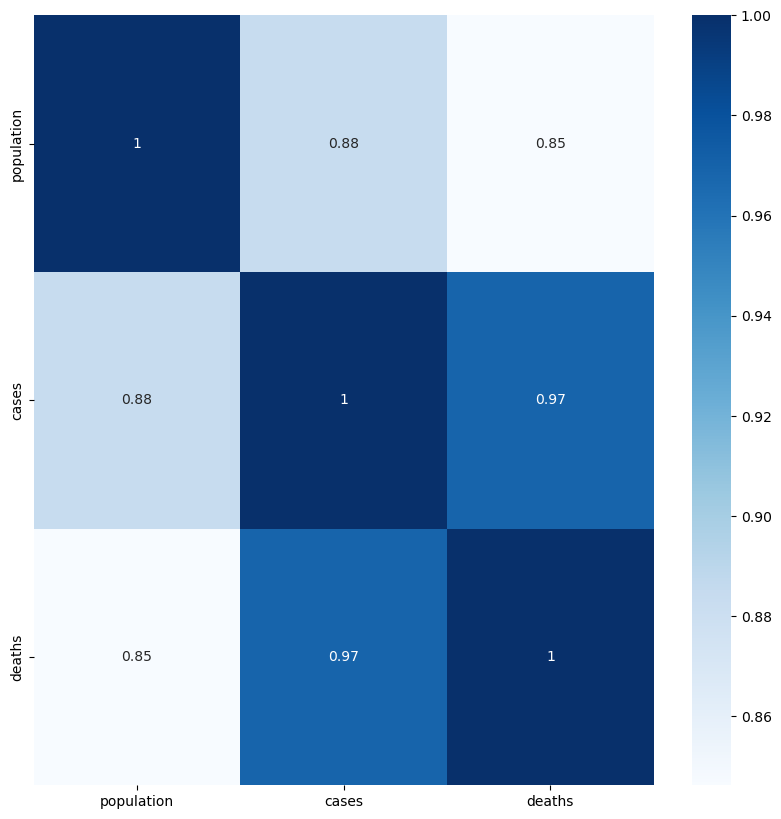

In [29]:
#created a subplot with matplotlib
f,ax = plt.subplots(figsize = (10,10))

#created heat map with seaborn
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax, cmap="Blues")

# Specify the complete file path, including the folder where you want to save the heatmap
file_path = '/Users/libertyonia/Documents/Covid/heatmap.png'

# Save the figure to the specified folder
f.savefig(file_path, dpi=300, bbox_inches='tight')


### Discuss what the coefficients in the plot mean in terms of the relationships between the variables.
- deaths & cases (r = 0.97): Strong positive correlation between deaths and cases. As cases increases so does deaths. 
- male & cases (r = 0.88): There is a strong positive correlation between male and cases. As male patients increase so does cases.
- female & cases (r = 0.88): There is a strong positive correlation between female and cases. As female patients increase so does cases.
- population & cases (r = 0.88): There is a strong positive correlation between population and cases. As population increases so does cases. 
- deaths & male (r=0.85): Strong positive correlation between deaths and males. As males increases so does deaths. 
- deaths & female (r = 0.85): Strong positive correlation between deaths and females. As females increases so does deaths. 



# 4. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
- Discuss the output in a markdown cell.

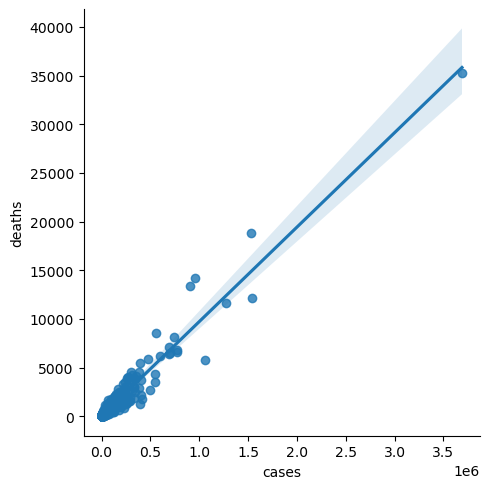

In [30]:
#scatterplot between deaths & cases
sns.lmplot(x='cases', y='deaths', data = aggregated_df)

There is a strong positive correlation between cases and deaths. As cases increases so does deaths. Majority of cases per county fall under 500,000 . Majority of deaths per county fall under 10,000. 

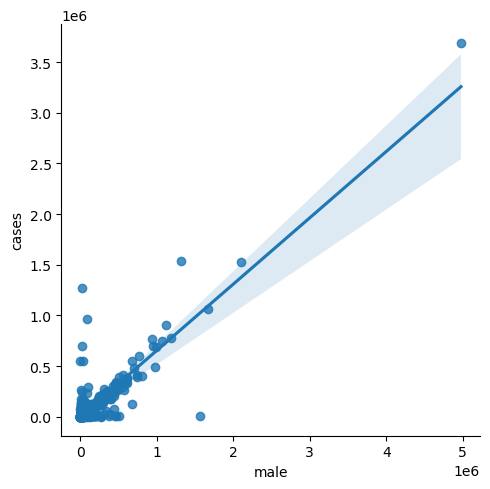

In [31]:
#scatterplot between male & cases
sns.lmplot(x='male', y='cases', data = aggregated_df)

Majority of counties have less than 1 million male residents. There are some countries with low male populations but high cases.

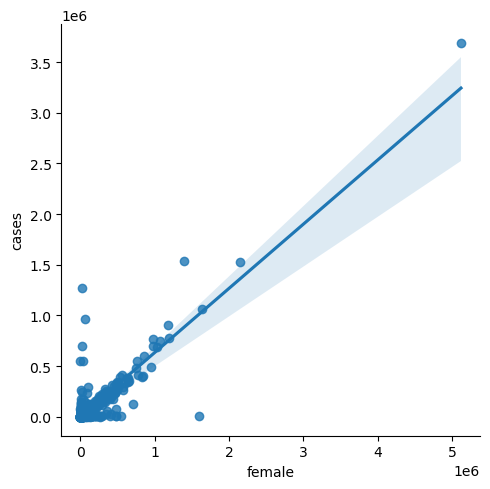

In [32]:
#scatterplot between female & cases
sns.lmplot(x='female', y='cases', data = aggregated_df)

Majority of counties have less than 1 million female residents. There are some countries with low female populations but high cases. There is an outlier with high female population and high cases. 

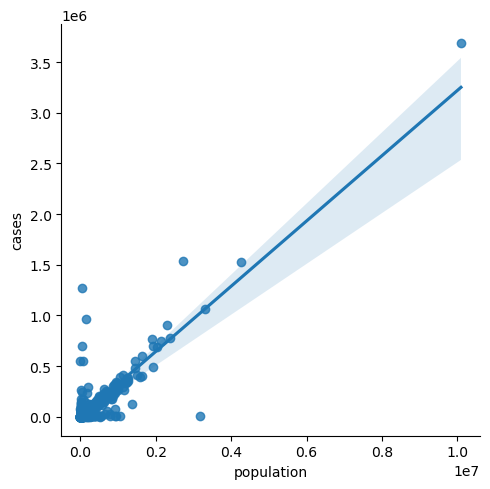

In [33]:
#scatterplot between population & cases 
sns.lmplot(x='population', y='cases', data = aggregated_df)

Majority of counties have less than 4 million residents. There are some counties with low population size and high cases. There is an outlier with a high population and high cases. 

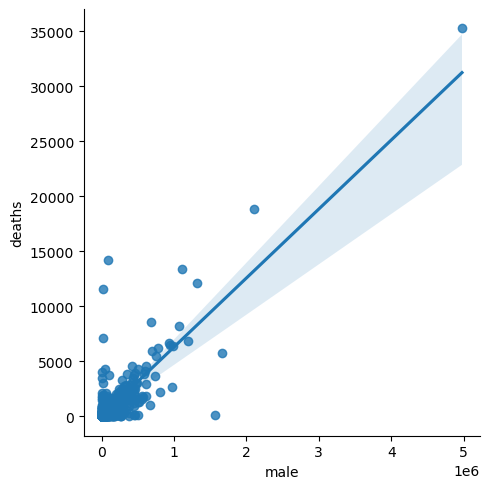

In [34]:
#scatterplot between deaths & male
sns.lmplot(x='male', y='deaths', data = aggregated_df)

Majority of male deaths are below 5000 people per county. There are some counties with high deaths, but low male population. There is an outlier with a high male population and high deaths. 

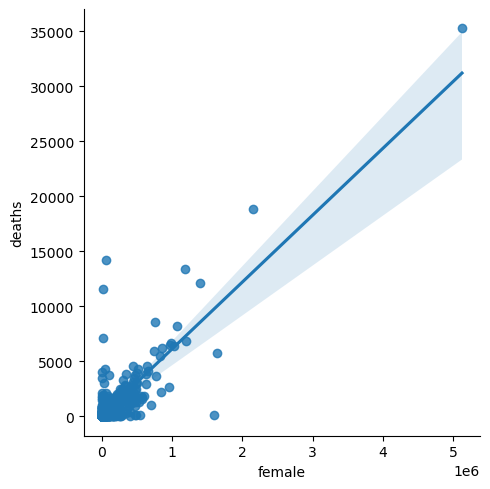

In [35]:
#scatterplot between deaths & female
sns.lmplot(x='female', y='deaths', data = aggregated_df)

Majority of female deaths are below 5000 people per county. There are some counties with high deaths, but low female population. There is an outlier with high female population and high deaths. 

# 5. Create a pair plot of the entire data set.
- Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

In [36]:
#keep the variables you want to use 
df_pairplot = aggregated_df[['cases', 'deaths', 'male', 'female','population']]

I chose cases and deaths, because these variables are the most relevant to the questions that I posed in the earlier assignment. I chose population so that I can see the relationship between population size and cases and deaths. I chose male and female, because I wanted to see if covid affects genders differently. 

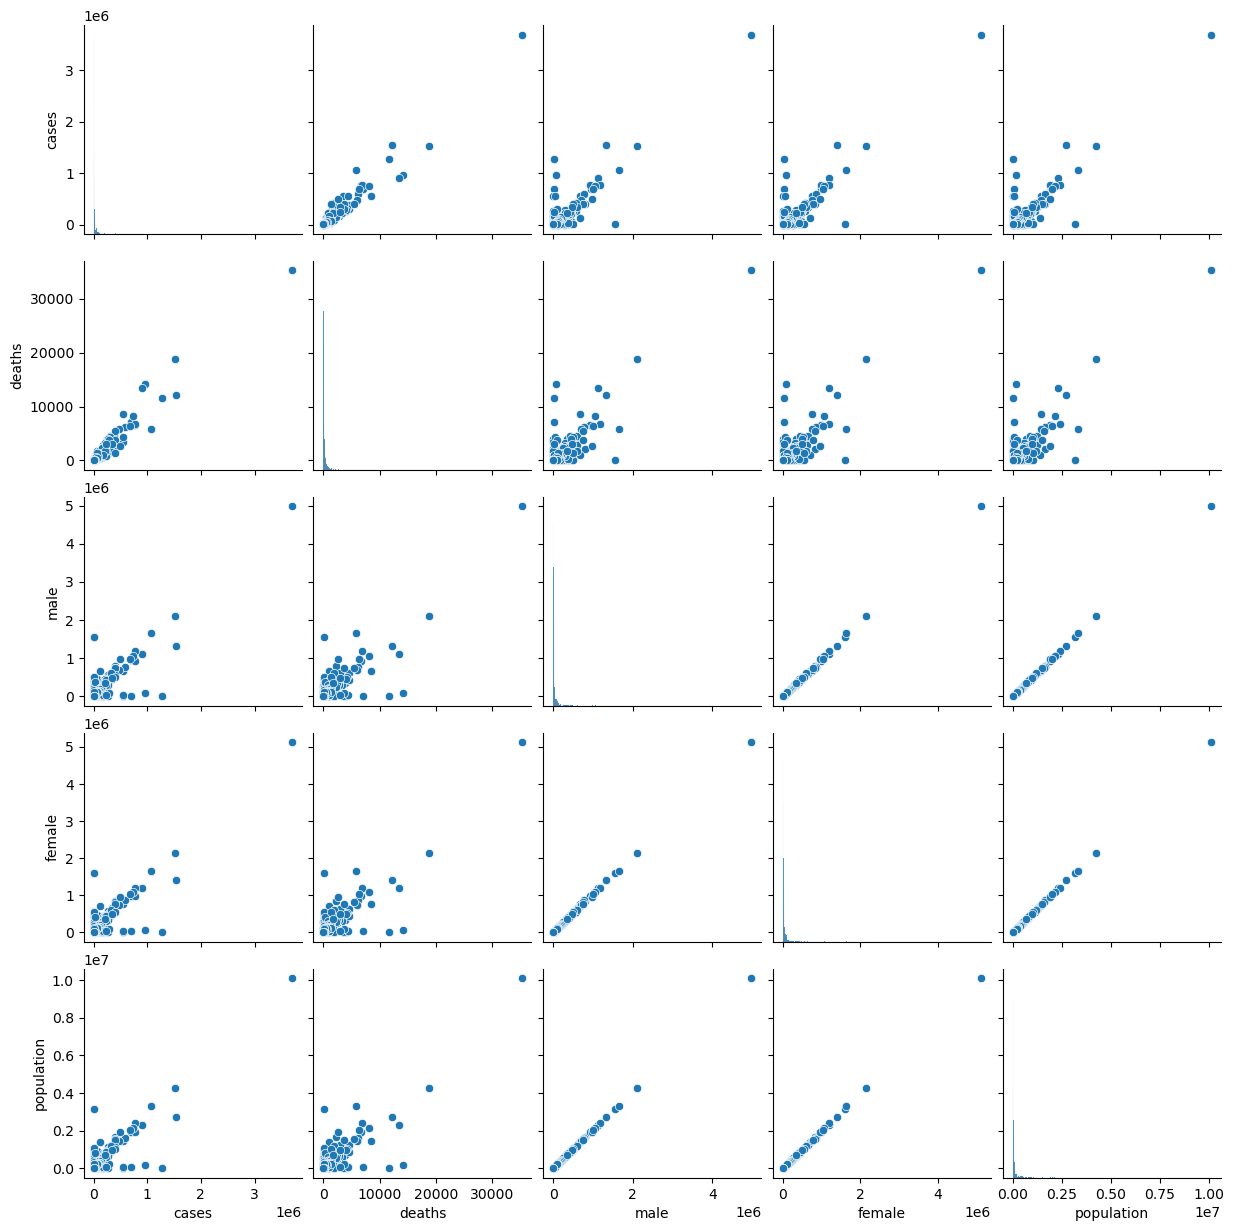

In [37]:
#create a pairplot of the subset 
pairplot = sns.pairplot(df_pairplot)

I noticed that the histograms are very small in the center of the pairplot. This is probably because there are more counties with small populations than counties that have larger populations. Moving forward, I would like to explore male and female vs cases and deaths. I also want to see if there is a difference in region deaths and cases. So I will create categorical plots investigating the regional effects of covid deaths and cases. 

# 6. Create a categorical plot and interpret the results.

In [38]:
#check the columns in the original dataframe
aggregated_df.head()

,county,state,population,male,female,median_age,region,female_percentage,cases,deaths
0,Abbeville,South Carolina,24657,11966,12691,43.8,South,51.470171,7806,78
1,Acadia,Louisiana,62568,30491,32077,36.2,South,51.267421,18892,310
2,Accomack,Virginia,32742,15861,16881,45.9,South,51.557632,9055,119
3,Ada,Idaho,446052,223367,222685,36.7,West,49.923552,159699,1137
4,Adair,Iowa,7124,3516,3608,45.4,Midwest,50.645705,9787,79


<Axes: xlabel='population', ylabel='Count'>

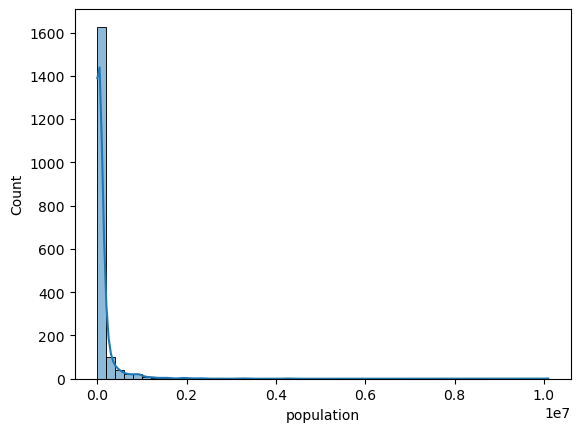

In [39]:
#create a histogram of population size 
sns.histplot(aggregated_df['population'], bins = 50, kde=True)
#majority of counties have a population less than 2 million 

In [40]:
#create a column where population < 1 million are small, 1<x<2 million are medium, >2 million are large
aggregated_df.loc[aggregated_df['population'] < 1000000, 'population_size'] = 'Small population'
aggregated_df.loc[(aggregated_df['population'] >= 1000000) & (aggregated_df['population'] < 2000000), 'population_size'] = 'Medium population'
aggregated_df.loc[aggregated_df['population'] >= 2000000, 'population_size'] = 'Large population'

In [41]:
#verify the new population_size column 
aggregated_df[aggregated_df['population'] > 2000000]

,county,state,population,male,female,median_age,region,female_percentage,cases,deaths,population_size
981,Los Angeles,California,10098052,4976788,5121264,36.2,West,50.715366,3691301,35250,Large population
1020,Maricopa,Arizona,4253913,2104145,2149768,36.1,West,50.536247,1526029,18812,Large population
1084,Miami-Dade,Florida,2715516,1318627,1396889,39.7,South,51.441015,1538402,12126,Large population
1223,Orange,California,3164182,1562429,1601753,37.8,West,50.621393,9172,109,Large population
1353,Queens,New York,2298513,1114654,1183859,38.7,Northeast,51.505430,902027,13417,Large population
1398,Riverside,California,2383286,1186188,1197098,35.3,West,50.228886,774340,6827,Large population
1443,San Bernardino,California,2135413,1062472,1072941,33.1,West,50.245128,743194,8171,Large population
1444,San Diego,California,3302833,1661931,1640902,35.6,West,49.681652,1062026,5759,Large population
1615,Tarrant,Texas,2019977,988765,1031212,34.3,South,51.050680,684688,6353,Large population


<Axes: xlabel='deaths', ylabel='Count'>

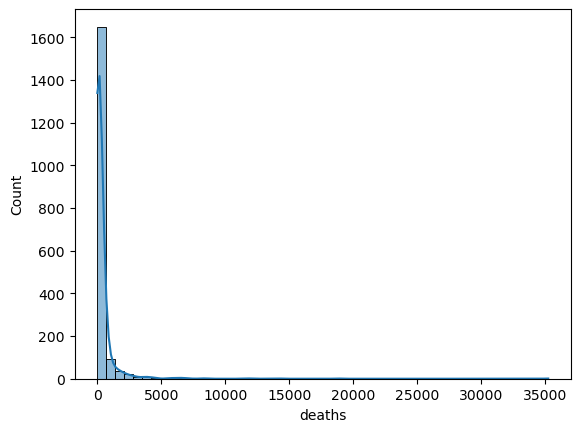

In [42]:
#create a histogram of deaths
sns.histplot(aggregated_df['deaths'], bins = 50, kde = True)
#majority of deaths are less than 5000

In [43]:
#create a column where deaths < 1000 are low, deaths 1000 < x < 5000 are median, deaths > 5000 are high
aggregated_df.loc[aggregated_df['deaths'] < 1000, 'death_size'] = 'Low mortality'
aggregated_df.loc[(aggregated_df['deaths'] >= 1000) & (aggregated_df['deaths'] < 5000), 'death_size'] = 'Medium mortality'
aggregated_df.loc[aggregated_df['deaths'] >= 5000, 'death_size'] = 'High mortality'

In [44]:
#verify the new death_size column 
aggregated_df[aggregated_df['deaths'] > 5000]

,county,state,population,male,female,median_age,region,female_percentage,cases,deaths,population_size,death_size
147,Bexar,Texas,1925865,950030,975835,33.4,South,50.669959,696535,6496,Medium population,High mortality
205,Bronx,New York,1437872,676963,760909,33.9,Northeast,52.919105,551497,8538,Medium population,High mortality
211,Broward,Florida,1909151,929712,979439,40.1,South,51.302333,769484,6640,Medium population,High mortality
438,Dallas,Alabama,40029,18448,21581,39.5,South,53.913413,693901,7115,Small population,High mortality
725,Harris,Georgia,33590,16832,16758,43.1,South,49.889848,1270743,11593,Small population,High mortality
888,Kings,California,150075,82674,67401,31.7,West,44.911544,960777,14205,Small population,High mortality
981,Los Angeles,California,10098052,4976788,5121264,36.2,West,50.715366,3691301,35250,Large population,High mortality
1020,Maricopa,Arizona,4253913,2104145,2149768,36.1,West,50.536247,1526029,18812,Large population,High mortality
1084,Miami-Dade,Florida,2715516,1318627,1396889,39.7,South,51.441015,1538402,12126,Large population,High mortality
1166,New York,New York,1632480,772144,860336,37.3,Northeast,52.701166,594091,6172,Medium population,High mortality


<Axes: xlabel='cases', ylabel='Count'>

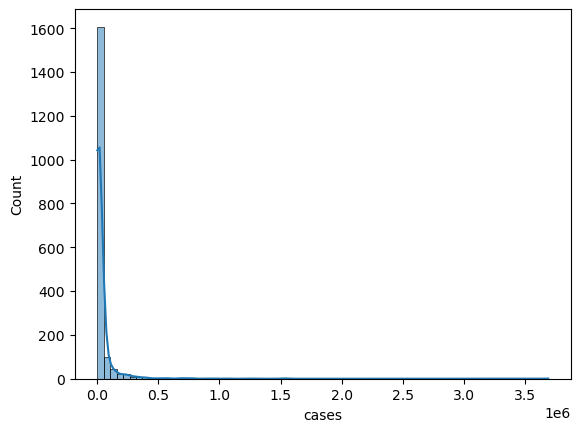

In [45]:
#create a histogram of cases
sns.histplot(aggregated_df['cases'], bins = 70, kde = True)
#Majority of cases are below 500,000 cases

In [46]:
#create a column where cases < 100,000 are low, cases 100,000 < x < 500,000 are median, cases > 500,000 are high
aggregated_df.loc[aggregated_df['cases'] < 100000, 'case_size'] = 'Low cases'
aggregated_df.loc[(aggregated_df['cases'] >= 100000) & (aggregated_df['cases'] < 500000), 'case_size'] = 'Medium cases'
aggregated_df.loc[aggregated_df['cases'] >= 500000, 'case_size'] = 'High cases'

In [47]:
#verify the new case_size column 
aggregated_df[aggregated_df['cases'] < 100000]

,county,state,population,male,female,median_age,region,female_percentage,cases,deaths,population_size,death_size,case_size
0,Abbeville,South Carolina,24657,11966,12691,43.8,South,51.470171,7806,78,Small population,Low mortality,Low cases
1,Acadia,Louisiana,62568,30491,32077,36.2,South,51.267421,18892,310,Small population,Low mortality,Low cases
2,Accomack,Virginia,32742,15861,16881,45.9,South,51.557632,9055,119,Small population,Low mortality,Low cases
4,Adair,Iowa,7124,3516,3608,45.4,Midwest,50.645705,9787,79,Small population,Low mortality,Low cases
5,Adams,Colorado,497115,250704,246411,33.6,West,49.568209,5833,70,Small population,Low mortality,Low cases
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,Yukon-Koyukuk,Alaska,5415,2910,2505,35.3,West,46.260388,1742,13,Small population,Low mortality,Low cases
1834,Yuma,Arizona,207829,106973,100856,34.3,West,48.528357,2331,27,Small population,Low mortality,Low cases
1835,Zapata,Texas,14369,7177,7192,29.6,South,50.052196,4499,57,Small population,Low mortality,Low cases
1836,Zavala,Texas,12131,6208,5923,32.9,South,48.825324,4530,70,Small population,Low mortality,Low cases


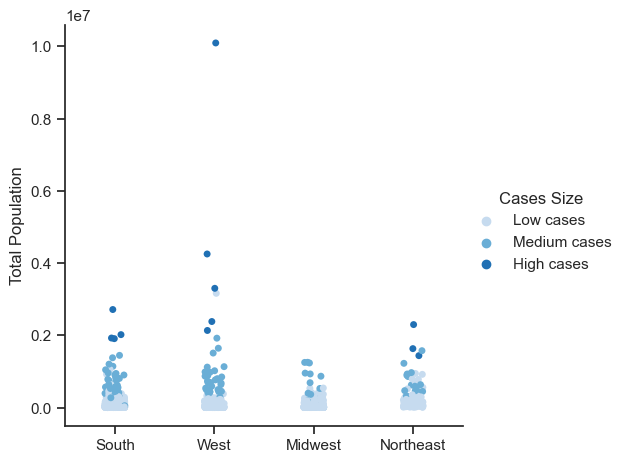

In [48]:
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom font family (Times)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'

# Set the style
sns.set(style='ticks')

# Create the categorical plot using the custom palette
cat = sns.catplot(x='region', y='population', hue='case_size', data=aggregated_df, palette='Blues')

plt.xlabel("")
plt.ylabel("Total Population")

# Set the title of the original Seaborn legend
cat._legend.set_title("Cases Size")

# Specify the complete file path, including the folder where you want to save the plot
file_path = '/Users/libertyonia/Documents/Covid/catplot1.png'

# Save the figure to the specified folder
cat.savefig(file_path, dpi=300, bbox_inches='tight')


Majority of counties in the South, West, Midwest, and Northeast have a population less than 2,000,000 million residents. All regions have both low and medium cases. The Midwest has only low and medium cases (cases<500,000). There is a county in the West that has over 3 million residents and low cases. There is a county in the West that has a high population and high cases. 
 are 

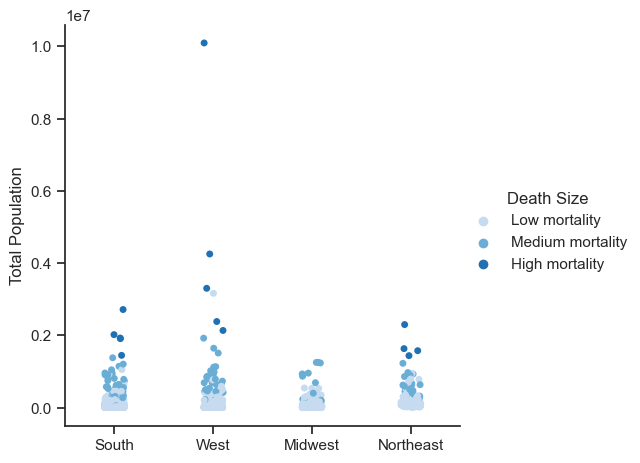

In [49]:
#create categorical plot using the region variable 
sns.set(style='ticks')
cat = sns.catplot(x='region', y='population',hue='death_size',data=aggregated_df, palette='Blues')

plt.xlabel("")
plt.ylabel("Total Population")
cat._legend.set_title("Death Size")
file_path = '/Users/libertyonia/Documents/Covid/catplot2.png'
cat.savefig(file_path, dpi=300, bbox_inches='tight')

Majority of regions have medium and low death numbers (deaths < 5000). The Midwest does not have a county with high deaths (deaths > 5000). There is a county in the West that has a high population (~3 million) and low deaths. 

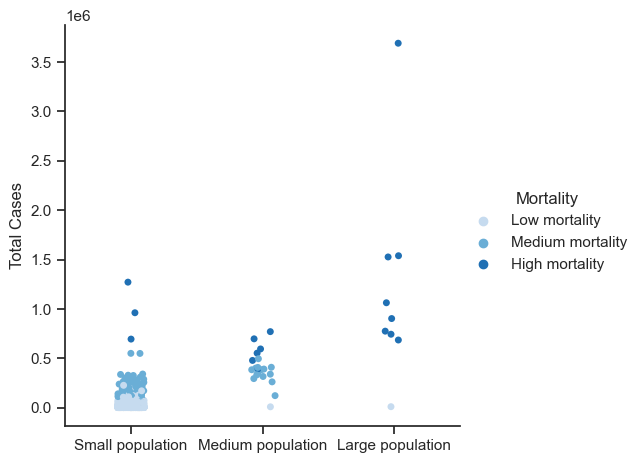

In [59]:
# Define a custom font family (Times)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'

#create categorical plot using the region variable 
sns.set(style='ticks')
cat = sns.catplot(x='population_size', y='cases',hue='death_size',data=aggregated_df,palette='Blues')

plt.xlabel("")
plt.ylabel("Total Cases")
cat._legend.set_title("Mortality")
file_path = '/Users/libertyonia/Documents/Covid/catplot3.png'
cat.savefig(file_path, dpi=300, bbox_inches='tight')

Counties of with a small populations (less than 1,000,000 residents) have mostly low numbers of deaths and cases. There are three counties that have small populations and high deaths. Medium population counties have mostly medium and high deaths (>5000 deaths). There is one county that has a medium population and low deaths. Majority of large populated counties have high deaths, but one county has low deaths. 

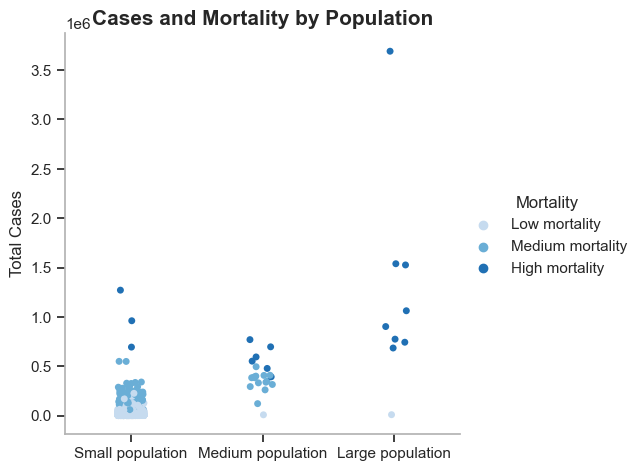

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom font family (Times)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times'


# Set the style
sns.set(style='ticks')

# Create the categorical plot using the custom palette
cat = sns.catplot(x='population_size', y='cases', hue='death_size', data=aggregated_df, palette='Blues')

# Customize the axis spines (lines) to be a lighter gray
light_gray = (0.7, 0.7, 0.7)  # RGB color code for lighter gray
cat.ax.spines['left'].set_color(light_gray)
cat.ax.spines['bottom'].set_color(light_gray)

plt.xlabel("")
plt.ylabel("Total Cases")
plt.title("Cases and Mortality by Population", fontsize=15, fontweight='bold')

# Set the title of the original Seaborn legend
cat._legend.set_title("Mortality")

# Specify the complete file path, including the folder where you want to save the plot
file_path = '/Users/libertyonia/Documents/Covid/catplot3.png'

# Save the figure to the specified folder with a higher DPI for HD quality
cat.savefig(file_path, dpi=1500, bbox_inches='tight')


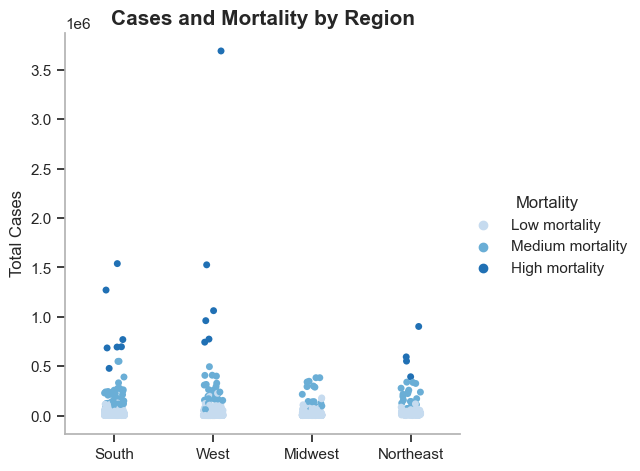

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom font family (Times)
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times'


# Set the style
sns.set(style='ticks')

# Create the categorical plot using the custom palette
cat = sns.catplot(x='region', y='cases', hue='death_size', data=aggregated_df, palette='Blues')

# Customize the axis spines (lines) to be a lighter gray
light_gray = (0.7, 0.7, 0.7)  # RGB color code for lighter gray
cat.ax.spines['left'].set_color(light_gray)
cat.ax.spines['bottom'].set_color(light_gray)

plt.xlabel("")
plt.ylabel("Total Cases")
plt.title("Cases and Mortality by Region", fontsize=15, fontweight='bold')

# Set the title of the original Seaborn legend
cat._legend.set_title("Mortality")

# Specify the complete file path, including the folder where you want to save the plot
file_path = '/Users/libertyonia/Documents/Covid/catplot4.png'

# Save the figure to the specified folder with a higher DPI for HD quality
cat.savefig(file_path, dpi=1500, bbox_inches='tight')


## 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

#### Does population size affect the percentage of cases and deaths? 
There is a strong positive correlation for both population vs cases and population vs deaths. As population size increases, so do cases and deaths. Interestingly, there are counties with low population size but high cases and deaths. I plan to further explore this finding. 

#### Does the median age affect the percentage of cases and deaths? 
There is a weak negative correlation for both median age vs cases and median age vs deaths. These relationships may not be interesting to explore, because there isn't a strong association. 

#### Additional Questions 
- What regions have the most deaths? 
- What regions have the most cases? 
- Are there any counties with high populations of women? How does this affect the cases and deaths? 
- Is there a distinct difference in deaths and cases between small, medium, and large populations? 
- How does vaccination affect cases and deaths? 




## 8. Define any hypotheses that you can at this point. You’ll be testing these later on.

Counties with larger population sizes have more people which increases the potential for infectious spread. If a county has a large population size, then it is more likely to have high COVID-19 cases and deaths. 

# Export the aggregated data with new columns 

In [ ]:
aggregated_df.head()

In [ ]:
#export aggregated dataset for future use 
aggregated_df.to_csv(os.path.join(path,'02 Data','Prepared Data','aggregated_cases_deaths_gender.csv'))